In [1]:

from io import StringIO
import requests
import json
import pandas as pd


df = pd.read_csv('data.csv')
#df.head()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'])
df.index = df['Time']
del df['Time']
#df.head()

In [3]:
df_Jan=df['2015-01-01':'2015-12-01']
#df_Jan.plot(y='Apartment2', figsize=(20,5))
df_Jan=df_Jan.resample('D', how='mean')

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_Jan['date'] = df_Jan.index
df_Jan['date'] = pd.to_datetime(df_Jan['date'])
#df_Jan.head()

In [5]:
import numpy as np

#df_A=df_Jan.sort_values(by=feature)
#X1 = (df_Jan['date'] - df_Jan['date'][0]).dt.days
#y1 = (df_Jan['Apartment2'].values)*1000

#X = df_Jan['temperature'].values
#y = (df_Jan['Apartment2'].values)*1000


X=(df_Jan['date'] - df_Jan['date'][0]).dt.days
y = (df_Jan['Apartment2'].values)*1000

#X = df_Jan.values[:,0:2]
#y = df_Jan.values[:,12]*1000



X=X.reshape(-1,1)
y=y.flatten()

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [6]:
# Not Splitting the dataset into the Training set and Test set as data set too small
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train=X_train.reshape(-1,1)
y_train=y_train.flatten()
X_test=X_test.reshape(-1,1)
y_test=y_test.flatten()

#lastFew=-31;
#X_train=X[:lastFew]
#X_test=X[lastFew:]
#y_train=y[:lastFew]
#y_test=y[lastFew:]


C:\Users\12bee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Fitting Linear Regression to the dataset for comparison purposes
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Fitting Polynomial Regression to the dataset
# This is just linear regression with PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
#set the maximum degree to use in the model
poly_reg = PolynomialFeatures(degree = 7)
#transform the feature matrix to introduce the derived polynomial features (each is Level raised to a higher power)
X_poly = poly_reg.fit_transform(X_train)
Xt_poly = poly_reg.fit_transform(X_test)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
predP=lin_reg_2.predict(Xt_poly)


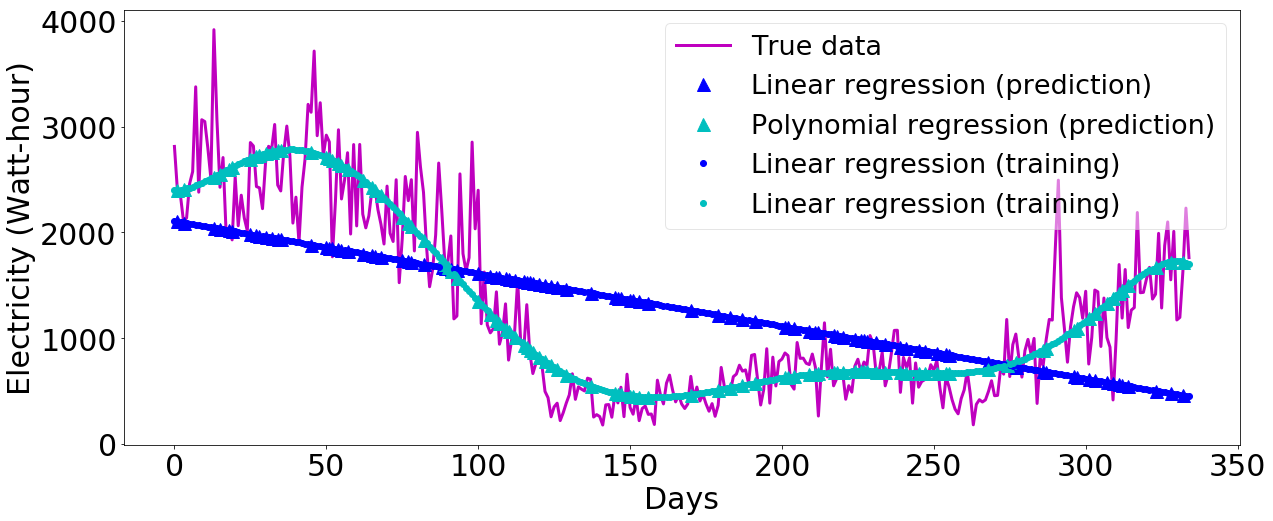

In [8]:
# Visualising the Linear Regression results

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 30})
plt.plot(X,y,'m-', label='True data', linewidth=3)

plt.plot(X_test, lin_reg.predict(X_test), 'b^', label='Linear regression (prediction)', ms=13)
plt.plot(X_test, predP, 'c^', label='Polynomial regression (prediction)', ms=13)

plt.plot(X_train, lin_reg.predict(X_train), 'bo', label='Linear regression (training)')
plt.plot(X_train, lin_reg_2.predict(X_poly), 'co', label='Linear regression (training)')
#plt.plot(X_grid, predP2, 'b-', label='Polynomial regression HD')

#plt.plot([X_train[-1], X_test[0]],[lin_reg.predict(X_train)[-1], lin_reg.predict(X_test)[0]], 'b-')
#plt.plot([X_train[-1], X_test[0]],[lin_reg_2.predict(X_poly)[-1], predP[0]],'c-')


#plt.title('Poly vs Linear Regression')
plt.ylabel('Electricity (Watt-hour)', fontsize=30)
plt.xlabel('Days', fontsize=30)
plt.legend(loc='upper right', fontsize=27,framealpha=0.5)
plt.savefig('6b.pdf', bbox_inches='tight')
plt.show()


In [9]:
import math

from sklearn.metrics import r2_score
print ("Poly,r2_score: " + str(r2_score(y_train, lin_reg_2.predict(X_poly))))
from sklearn.metrics import mean_squared_error
print ("Poly,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, predP)))/np.mean(y_test)))
print ("Poly,NMAE: " + str(1-np.mean(np.abs((y_test - predP) / y_test))))

from sklearn.metrics import r2_score
print ("Linear,r2_score: " + str(r2_score(y_train, lin_reg.predict(X_train))))
from sklearn.metrics import mean_squared_error
print ("Linear,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))/np.mean(y_test)))
print ("Linear,NMAE: " + str(1-np.mean(np.abs((y_test - lin_reg.predict(X_test)) / y_test))))

Poly,r2_score: 0.845151623683
Poly,RMSE: 0.754327828275
Poly,NMAE: 0.744701884903
Linear,r2_score: 0.3067807071
Linear,RMSE: 0.492932393608
Linear,NMAE: 0.239977555312
